In [8]:
#import bibliotek 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#import data
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643501
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897022
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [6]:
#ilosc wierszy i kolumn
df.shape

(2517, 6)

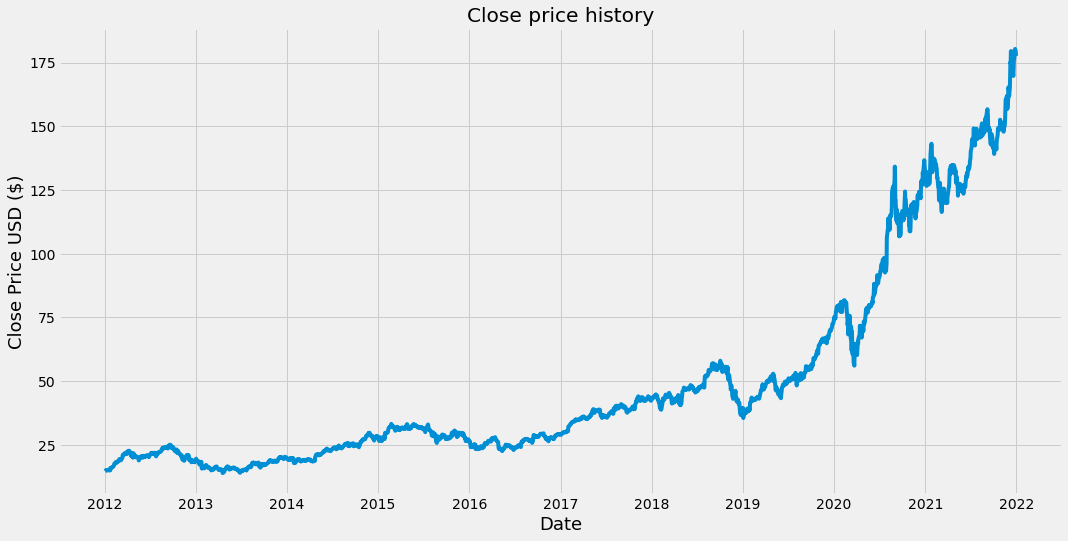

In [7]:
#wizualizacja 
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [9]:
  #nowy dataframe z zamknieciami
  data = df.filter(['Close'])
  #przekonwerowanie dataframe do numpy 
  dataset = data.values
  #ilosc wierszy    
  training_data_len = math.ceil(len(dataset) * .8)
  training_data_len

2014

In [11]:
#skalowanie wartosci pomiedzy 0 i 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [16]:
#stworzenie zbiory treningowego 
train_data = scaled_data[0:training_data_len, :]
#podzial danych na x_train i y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]



In [18]:
#skonwertowanie na wektory numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#przeksztalcenie danych
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1954, 60, 1)

In [23]:
#budowa LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#trenowanie modelu
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 40s 19ms/step - loss: 1.4429e-04


In [29]:
#stworzenie zbioru testowego index 1945 -> 2517
test_data = scaled_data[training_data_len - 60: , :]
#stowrzenie x_test i y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

print(y_test)
print(x_test)

[[ 74.94999695]
 [ 74.59750366]
 [ 75.79750061]
 [ 77.40750122]
 [ 77.58249664]
 [ 79.23999786]
 [ 78.16999817]
 [ 77.83499908]
 [ 78.80999756]
 [ 79.68250275]
 [ 79.14250183]
 [ 79.42500305]
 [ 79.80750275]
 [ 79.57749939]
 [ 77.23750305]
 [ 79.42250061]
 [ 81.08499908]
 [ 80.96749878]
 [ 77.37750244]
 [ 77.16500092]
 [ 79.71250153]
 [ 80.36250305]
 [ 81.30249786]
 [ 80.00749969]
 [ 80.38749695]
 [ 79.90249634]
 [ 81.80000305]
 [ 81.21749878]
 [ 81.23750305]
 [ 79.75      ]
 [ 80.90499878]
 [ 80.07499695]
 [ 78.26249695]
 [ 74.54499817]
 [ 72.01999664]
 [ 73.16249847]
 [ 68.37999725]
 [ 68.33999634]
 [ 74.70249939]
 [ 72.33000183]
 [ 75.68499756]
 [ 73.23000336]
 [ 72.25749969]
 [ 66.54250336]
 [ 71.33499908]
 [ 68.85749817]
 [ 62.05749893]
 [ 69.49250031]
 [ 60.55250168]
 [ 63.21500015]
 [ 61.66749954]
 [ 61.19499969]
 [ 57.31000137]
 [ 56.09249878]
 [ 61.72000122]
 [ 61.38000107]
 [ 64.61000061]
 [ 61.93500137]
 [ 63.70249939]
 [ 63.57249832]
 [ 60.22750092]
 [ 61.23249817]
 [ 60.35

In [34]:
#skonwertowanie danych do numpy
x_test= np.array(x_test)

In [37]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(503, 60, 1)

In [38]:
#predykcja modelu cen 
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [39]:
#sprawdzenie RMSE
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

0.24382232150311026

<ipython-input-51-c486cdba18d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


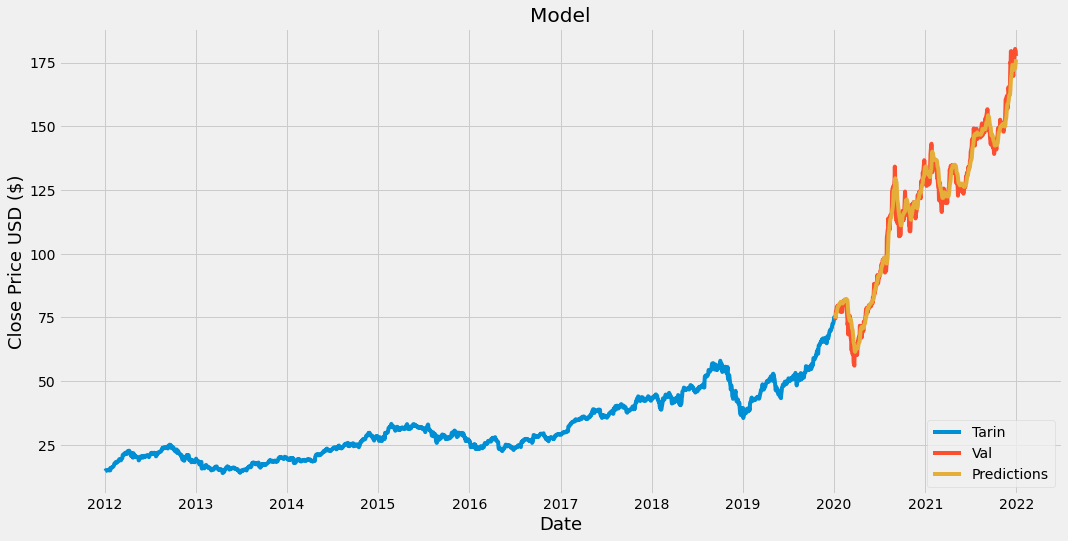

In [51]:
#wizualizacja danych
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Tarin', 'Val', 'Predictions'], loc='lower right')


In [57]:
valid['Error'] = abs(valid['Close'] - valid['Predictions'])
valid

<ipython-input-57-5eee36435ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Error'] = abs(valid['Close'] - valid['Predictions'])


,Close,Predictions,Error
Date,,,
2020-01-06,74.949997,74.571938,0.378059
2020-01-07,74.597504,75.066208,0.468704
2020-01-08,75.797501,75.424965,0.372536
2020-01-09,77.407501,75.841240,1.566261
2020-01-10,77.582497,76.447456,1.135040
...,...,...,...
2021-12-27,180.330002,172.685455,7.644547
2021-12-28,179.289993,173.797516,5.492477
2021-12-29,179.380005,174.838974,4.541031


In [60]:
#zaciagniecie danych
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-03-01')
#stworzenie nowego dataframe
new_df =  apple_quote.filter(['Close'])
#wziecie ostatnich 60 wartosci i przeksztalcenie ich w numpy array
last_60_days = new_df[-60:].values
#skalowanie danych
last_60_days_scaled = scaler.transform(last_60_days)
#podzial na test
X_test = []
#dodanie 
X_test.append(last_60_days_scaled)
#skonwertowanie na numpy array
X_test = np.array(X_test)
#przeksztalcenie
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#predykcja 
pred_price = model.predict(X_test)
#cofniecie skali
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) #przewidzenie co bedzie 2.03.2022

[[163.70184]]


In [61]:
#faktyczna cena
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-03-02', end='2022-03-02')
print(apple_quote2['Close'])

Date
2022-03-02    166.559998
Name: Close, dtype: float64
